# 자전거 파일 분석 : 

서울특별시 공공자전거 대여이력 정보 2019년 6월

서울특별시 공공자전거 대여정보_201906_1.csv

서울특별시 공공자전거 대여정보_201906_2.csv

서울특별시 공공자전거 대여정보_201906_3.csv

# 1. 데이터 수집 및 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# 한글 폰트를 위한 라이브러리를 임포트하고 해당 변수를 설정한다.

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 2. 데이터 가공

## 2-1. 분석할 데이터프레임 만들기

In [3]:
#  2019년 6월 3개로 나누어진 raw data로 읽어 들이고 연결한다. 

bike_1 = pd.read_csv('./data/서울특별시 공공자전거 대여정보_201906_1.csv', \
                    encoding = 'cp949', parse_dates=['대여일시','반납일시'])
bike_1.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.00
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.00


In [4]:
bike_2 = pd.read_csv('./data/서울특별시 공공자전거 대여정보_201906_2.csv', \
                    encoding = 'cp949', parse_dates=['대여일시','반납일시'])
bike_3 = pd.read_csv('./data/서울특별시 공공자전거 대여정보_201906_3.csv', \
                    encoding = 'cp949', parse_dates=['대여일시','반납일시'])

In [5]:
bike_ride = pd.concat([bike_1, bike_2, bike_3], axis = 'index', ignore_index = True)

bike_ride

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.00
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.00
5,SPB-13926,2019-06-11 08:29:37,646,장한평역 1번출구 (국민은행앞),4,2019-06-11 08:37:24,3,중랑센터,2,7,1360.00
6,SPB-14638,2019-06-12 08:29:20,646,장한평역 1번출구 (국민은행앞),4,2019-06-12 08:35:22,3,중랑센터,2,5,1340.00
7,SPB-18588,2019-06-17 08:34:59,646,장한평역 1번출구 (국민은행앞),5,2019-06-17 08:44:04,3,중랑센터,2,8,1360.00
8,SPB-21148,2019-06-17 08:47:44,646,장한평역 1번출구 (국민은행앞),6,2019-06-17 09:10:34,3,중랑센터,14,22,1330.00
9,SPB-24533,2019-06-18 08:36:59,646,장한평역 1번출구 (국민은행앞),9,2019-06-18 08:43:54,3,중랑센터,2,6,1230.00


## 2-2. 데이터프레임 관찰하기

In [6]:
# bike_ride 의 정보를 알려주는 명령어는 ?

bike_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 11 columns):
자전거번호       object
대여일시        datetime64[ns]
대여 대여소번호    int64
대여 대여소명     object
대여거치대       int64
반납일시        datetime64[ns]
반납대여소번호     int64
반납대여소명      object
반납거치대       int64
이용시간        int64
이용거리        float64
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 185.9+ MB


In [7]:
# 실습 : bike_ride 의 정보를 알려주는 명령어는 ?



In [8]:
# bike_ride 의 전체 행수는 ?

bike_ride.shape[0]

2215632

In [9]:
# 실습 : bike_ride 의 전체 행수는 ?



In [10]:
# bike_ride 의 인덱스는 ?

bike_ride.index

RangeIndex(start=0, stop=2215632, step=1)

In [11]:
# 실습 : bike_ride 의 인덱스는 ?



In [12]:
# bike_ride 의 열수는 ?

bike_ride.shape[1]

11

In [13]:
# 실습 : bike_ride 의 열수는 ?



In [14]:
# bike_ride 의 컬럼은 ?

bike_ride.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리'],
      dtype='object')

In [15]:
# 실습 : bike_ride 의 컬럼은 ?



In [16]:
# bike_ride 의 컬럼의 데이터타입은 ?

bike_ride.dtypes

자전거번호               object
대여일시        datetime64[ns]
대여 대여소번호             int64
대여 대여소명             object
대여거치대                int64
반납일시        datetime64[ns]
반납대여소번호              int64
반납대여소명              object
반납거치대                int64
이용시간                 int64
이용거리               float64
dtype: object

In [17]:
# 실습 : bike_ride 의 컬럼의 데이터타입은 ?



In [18]:
# bike_ride 의 shape은 ?

bike_ride.shape

(2215632, 11)

In [19]:
# 실습 : bike_ride 의 shape은 ?



In [20]:
# bike_ride 데이터프레임의 요약통계 알아보기
# 이용시간은 평균이 27분, 이용거리는 약 4km

bike_ride.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00
mean,1226.15,7.01,1228.35,6.97,27.17,3912.92
std,849.92,5.24,846.23,5.24,29.08,5145.47
min,3.00,1.00,3.00,1.00,1.00,0.00
25%,505.00,3.00,512.00,3.00,8.00,1220.00
50%,1159.00,6.00,1159.00,6.00,17.00,2270.00
75%,1846.00,10.00,1839.00,10.00,37.00,4670.00
max,9998.00,40.00,9998.00,40.00,3133.00,232310.00


In [21]:
# 실습 : bike_ride 데이터프레임의 요약통계 알아보기



In [22]:
# 데이터타입이 object와 np.datetime64인 경우의 요약통계
# 1543개 대여소,   자전거는 19029 대 관리 됨. 

bike_ride.describe(include = ['object', 'datetime64'])

,자전거번호,대여일시,대여 대여소명,반납일시,반납대여소명
count,2215632,2215632,2215632,2215632,2215632
unique,19029,1317207,1543,1321020,1543
top,SPB-17237,2019-06-05 18:06:56,뚝섬유원지역 1번출구 앞,2019-06-13 08:31:30,뚝섬유원지역 1번출구 앞
freq,292,13,12617,18,14019
first,NaN,2019-06-01 00:00:02,NaN,2019-06-01 00:02:51,NaN
last,NaN,2019-06-30 23:59:56,NaN,2019-07-03 03:09:28,NaN


In [23]:
# 실습 : 데이터타입이 object와 np.datetime64인 경우의 요약통계



In [24]:
# 누락값 조사

bike_ride.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [25]:
# 1단계 -> 전체 데이터프레임의 각각의 컬럼값이 null인지 판단한다.

bike_ride.isnull()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# 실습 : 1단계 -> 전체 데이터프레임의 각각의 컬럼값이 null인지 판단한다.



In [27]:
# 2단계 -> 각각의 컬럼값의 합을 구한다.

bike_ride.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [28]:
# 실습 : 2단계 -> 각각의 컬럼값의 합을 구한다.



In [29]:
# bike_ride의 처음 5개 행 보여주기

bike_ride.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.00
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.00


In [30]:
# 실습 : bike_ride의 처음 5개 행 보여주기



In [31]:
# bike_ride의 마지막 5개 행 보여주기

bike_ride.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
2215627,SPB-22438,2019-06-24 07:40:39,240,문래역 4번출구 앞,8,2019-06-24 07:54:16,9998,영남주차장 정비센터,10,13,900.00
2215628,SPB-24455,2019-06-25 07:34:58,240,문래역 4번출구 앞,7,2019-06-25 07:42:14,9998,영남주차장 정비센터,4,6,880.00
2215629,SPB-24557,2019-06-26 08:19:57,240,문래역 4번출구 앞,4,2019-06-26 08:27:49,9998,영남주차장 정비센터,10,7,930.00
2215630,SPB-00649,2019-06-27 07:38:12,240,문래역 4번출구 앞,9,2019-06-27 07:49:52,9998,영남주차장 정비센터,10,11,1030.00
2215631,SPB-14209,2019-06-28 07:37:07,240,문래역 4번출구 앞,10,2019-06-28 07:43:54,9998,영남주차장 정비센터,10,6,1010.00


In [32]:
# 실습 : bike_ride의 마지막 5개 행 보여주기



## 2-3. 분석주제에 맞는 새로운 컬럼 추가하기

In [33]:
# 일자 비교를 위해서 요일 컬럼 추가

요일 = ['월','화','수','목','금','토','일']
bike_ride['요일'] = bike_ride['대여일시'].dt.dayofweek.apply(lambda x: 요일[x])
bike_ride['요일']

0          월
1          월
2          수
3          수
4          월
5          화
6          수
7          월
8          월
9          화
10         화
11         수
12         목
13         금
14         금
15         월
16         화
17         수
18         목
19         목
20         금
21         화
22         수
23         일
24         금
25         월
26         월
27         화
28         수
29         수
          ..
2215602    목
2215603    목
2215604    금
2215605    금
2215606    월
2215607    화
2215608    화
2215609    수
2215610    수
2215611    수
2215612    수
2215613    수
2215614    일
2215615    일
2215616    월
2215617    화
2215618    목
2215619    일
2215620    화
2215621    화
2215622    수
2215623    월
2215624    월
2215625    화
2215626    수
2215627    월
2215628    화
2215629    수
2215630    목
2215631    금
Name: 요일, Length: 2215632, dtype: object

In [34]:
# bike_ride['대여일시']는 날짜 데이터타입을 가진다.

bike_ride['대여일시']

0         2019-06-03 08:49:27
1         2019-06-03 08:33:22
2         2019-06-05 08:27:47
3         2019-06-05 08:46:29
4         2019-06-10 08:27:26
5         2019-06-11 08:29:37
6         2019-06-12 08:29:20
7         2019-06-17 08:34:59
8         2019-06-17 08:47:44
9         2019-06-18 08:36:59
10        2019-06-18 08:46:39
11        2019-06-19 08:51:47
12        2019-06-20 08:36:28
13        2019-06-21 08:34:15
14        2019-06-21 08:45:18
15        2019-06-24 08:33:07
16        2019-06-25 08:45:02
17        2019-06-26 08:32:09
18        2019-06-27 08:35:56
19        2019-06-27 08:47:26
20        2019-06-28 08:44:22
21        2019-06-04 08:24:20
22        2019-06-12 11:49:00
23        2019-06-16 07:27:15
24        2019-06-21 08:23:08
25        2019-06-24 07:11:15
26        2019-06-24 11:20:34
27        2019-06-25 08:32:32
28        2019-06-26 08:32:26
29        2019-06-19 13:49:13
                  ...        
2215602   2019-06-20 13:19:23
2215603   2019-06-20 14:13:12
2215604   

In [35]:
# 실습 : bike_ride['대여일시']는 날짜 데이터타입을 가진다.



In [36]:
# bike_ride['대여일시']에서 요일을 추출한다. -> 0:월 1:화 2:수 3:목 4:금 5:토 6:일

bike_ride['대여일시'].dt.dayofweek

0          0
1          0
2          2
3          2
4          0
5          1
6          2
7          0
8          0
9          1
10         1
11         2
12         3
13         4
14         4
15         0
16         1
17         2
18         3
19         3
20         4
21         1
22         2
23         6
24         4
25         0
26         0
27         1
28         2
29         2
          ..
2215602    3
2215603    3
2215604    4
2215605    4
2215606    0
2215607    1
2215608    1
2215609    2
2215610    2
2215611    2
2215612    2
2215613    2
2215614    6
2215615    6
2215616    0
2215617    1
2215618    3
2215619    6
2215620    1
2215621    1
2215622    2
2215623    0
2215624    0
2215625    1
2215626    2
2215627    0
2215628    1
2215629    2
2215630    3
2215631    4
Name: 대여일시, Length: 2215632, dtype: int64

In [37]:
# 실습 : bike_ride['대여일시']에서 요일을 추출한다. -> 0:월 1:화 2:수 3:목 4:금 5:토 6:일



In [38]:
# apply 명령어와 lambda함수를 사용하여 0~6값을 월~일 값으로 변환시킨다.

bike_ride['대여일시'].dt.dayofweek.apply(lambda x : 요일[x])

0          월
1          월
2          수
3          수
4          월
5          화
6          수
7          월
8          월
9          화
10         화
11         수
12         목
13         금
14         금
15         월
16         화
17         수
18         목
19         목
20         금
21         화
22         수
23         일
24         금
25         월
26         월
27         화
28         수
29         수
          ..
2215602    목
2215603    목
2215604    금
2215605    금
2215606    월
2215607    화
2215608    화
2215609    수
2215610    수
2215611    수
2215612    수
2215613    수
2215614    일
2215615    일
2215616    월
2215617    화
2215618    목
2215619    일
2215620    화
2215621    화
2215622    수
2215623    월
2215624    월
2215625    화
2215626    수
2215627    월
2215628    화
2215629    수
2215630    목
2215631    금
Name: 대여일시, Length: 2215632, dtype: object

In [39]:
# 실습 : apply 명령어와 lambda함수를 사용하여 0~6값을 월~일 값으로 변환시킨다.

#bike_ride['대여일시'].dt.dayofweek.apply(    )

In [40]:
# bike_ride에 새로운 컬럼인 '요일'을 추가한다.

bike_ride['요일'] = bike_ride['대여일시'].dt.dayofweek.apply(lambda x: 요일[x])

In [41]:
# bike_ride['요일'] 값을 확인한다.

bike_ride['요일']

0          월
1          월
2          수
3          수
4          월
5          화
6          수
7          월
8          월
9          화
10         화
11         수
12         목
13         금
14         금
15         월
16         화
17         수
18         목
19         목
20         금
21         화
22         수
23         일
24         금
25         월
26         월
27         화
28         수
29         수
          ..
2215602    목
2215603    목
2215604    금
2215605    금
2215606    월
2215607    화
2215608    화
2215609    수
2215610    수
2215611    수
2215612    수
2215613    수
2215614    일
2215615    일
2215616    월
2215617    화
2215618    목
2215619    일
2215620    화
2215621    화
2215622    수
2215623    월
2215624    월
2215625    화
2215626    수
2215627    월
2215628    화
2215629    수
2215630    목
2215631    금
Name: 요일, Length: 2215632, dtype: object

In [42]:
# 실습 : bike_ride['요일'] 값을 확인한다.



In [43]:
# bike_ride에 '요일'컬럼이 추가된 것을 확인한다.

bike_ride.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00,월
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00,월
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00,수
3,SPB-16794,2019-06-05 08:46:29,646,장한평역 1번출구 (국민은행앞),6,2019-06-05 08:53:10,3,중랑센터,14,6,1340.00,수
4,SPB-18266,2019-06-10 08:27:26,529,장한평역 8번 출구 앞,10,2019-06-10 08:33:40,3,중랑센터,2,5,1230.00,월


In [44]:
# 실습 : bike_ride에 '요일'컬럼이 추가된 것을 확인한다.



In [45]:
bike_ride['대여일시'].dt.dayofweek.apply(\
        lambda x : '평일' if x < 5 else '주말')

0          평일
1          평일
2          평일
3          평일
4          평일
5          평일
6          평일
7          평일
8          평일
9          평일
10         평일
11         평일
12         평일
13         평일
14         평일
15         평일
16         평일
17         평일
18         평일
19         평일
20         평일
21         평일
22         평일
23         주말
24         평일
25         평일
26         평일
27         평일
28         평일
29         평일
           ..
2215602    평일
2215603    평일
2215604    평일
2215605    평일
2215606    평일
2215607    평일
2215608    평일
2215609    평일
2215610    평일
2215611    평일
2215612    평일
2215613    평일
2215614    주말
2215615    주말
2215616    평일
2215617    평일
2215618    평일
2215619    주말
2215620    평일
2215621    평일
2215622    평일
2215623    평일
2215624    평일
2215625    평일
2215626    평일
2215627    평일
2215628    평일
2215629    평일
2215630    평일
2215631    평일
Name: 대여일시, Length: 2215632, dtype: object

In [108]:
bike_ride['대여일시'].dt.day_name("ko_kr")

0          ¿ù¿äàï
1          ¼ö¿äàï
2          ¼ö¿äàï
3          È­¿äàï
4          ¼ö¿äàï
5          ¿ù¿äàï
6          ¿ù¿äàï
7          È­¿äàï
8          È­¿äàï
9          ¼ö¿äàï
10         ¸ñ¿äàï
11         ±ý¿äàï
12         ¿ù¿äàï
13         ¼ö¿äàï
14         ¸ñ¿äàï
15         ±ý¿äàï
16         È­¿äàï
17         È­¿äàï
18         ¼ö¿äàï
19         ±ý¿äàï
20         È­¿äàï
21         ¼ö¿äàï
22         ±ý¿äàï
23         ¿ù¿äàï
24         ¸ñ¿äàï
25         ±ý¿äàï
26         ¿ù¿äàï
27         ±ý¿äàï
28         ±ý¿äàï
29         ¸ñ¿äàï
            ...  
2209319    È­¿äàï
2209320    Åä¿äàï
2209321    Àï¿äàï
2209322    ¼ö¿äàï
2209323    ¸ñ¿äàï
2209324    ¿ù¿äàï
2209325    ¸ñ¿äàï
2209326    Åä¿äàï
2209327    Åä¿äàï
2209328    È­¿äàï
2209329    È­¿äàï
2209330    ¼ö¿äàï
2209331    È­¿äàï
2209332    Åä¿äàï
2209333    ¸ñ¿äàï
2209334    Åä¿äàï
2209335    ¼ö¿äàï
2209336    Åä¿äàï
2209337    Àï¿äàï
2209338    ¼ö¿äàï
2209339    Àï¿äàï
2209340    Åä¿äàï
2209341    ¼ö¿äàï
2209342    ¼ö¿äàï
2209343   

In [46]:
# 주중/주말공휴일 구분
bike_ride['주말구분'] = bike_ride['대여일시'].dt.dayofweek.apply(\
                                lambda x : '평일' if x < 5 else '주말')

# 일자 컬럼 추가
bike_ride['일자'] = bike_ride['대여일시'].dt.day

# 시간대 컬럼 추가
bike_ride['대여시간대'] =bike_ride['대여일시'].dt.hour
bike_ride['반납시간대'] =  bike_ride['반납일시'].dt.hour

bike_ride.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,주말구분,일자,대여시간대,반납시간대
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00,월,평일,3,8,9
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.00,월,평일,3,8,9


In [47]:
# 위에서 만든 시간개념 컬럼들이 추가된 bike_ride 데이터프레임의 정보를 알아본다.

bike_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 16 columns):
자전거번호       object
대여일시        datetime64[ns]
대여 대여소번호    int64
대여 대여소명     object
대여거치대       int64
반납일시        datetime64[ns]
반납대여소번호     int64
반납대여소명      object
반납거치대       int64
이용시간        int64
이용거리        float64
요일          object
주말구분        object
일자          int64
대여시간대       int64
반납시간대       int64
dtypes: datetime64[ns](2), float64(1), int64(8), object(5)
memory usage: 270.5+ MB


In [48]:
# 실습 : 위에서 만든 시간개념 컬럼들이 추가된 bike_ride 데이터프레임의 정보를 알아본다.



In [49]:
# bike_ride 수치데이터타입을 가진 컬럼들의 요약통계를 알아본다.

bike_ride.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,일자,대여시간대,반납시간대
count,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00,2215632.00
mean,1226.15,7.01,1228.35,6.97,27.17,3912.92,15.74,14.49,14.50
std,849.92,5.24,846.23,5.24,29.08,5145.47,8.64,6.33,6.59
min,3.00,1.00,3.00,1.00,1.00,0.00,1.00,0.00,0.00
25%,505.00,3.00,512.00,3.00,8.00,1220.00,8.00,10.00,10.00
50%,1159.00,6.00,1159.00,6.00,17.00,2270.00,16.00,16.00,17.00
75%,1846.00,10.00,1839.00,10.00,37.00,4670.00,23.00,19.00,20.00
max,9998.00,40.00,9998.00,40.00,3133.00,232310.00,30.00,23.00,23.00


In [50]:
# 실습 : bike_ride 수치데이터타입을 가진 컬럼들의 요약통계를 알아본다.



In [51]:
# bike_ride의 데이터타입이 object와 datetime64인 경우의 요약통계를 알아본다.

bike_ride.describe(include=['object', 'datetime64'])

,자전거번호,대여일시,대여 대여소명,반납일시,반납대여소명,요일,주말구분
count,2215632,2215632,2215632,2215632,2215632,2215632,2215632
unique,19029,1317207,1543,1321020,1543,7,2
top,SPB-17237,2019-06-05 18:06:56,뚝섬유원지역 1번출구 앞,2019-06-13 08:31:30,뚝섬유원지역 1번출구 앞,토,평일
freq,292,13,12617,18,14019,375943,1478599
first,NaN,2019-06-01 00:00:02,NaN,2019-06-01 00:02:51,NaN,NaN,NaN
last,NaN,2019-06-30 23:59:56,NaN,2019-07-03 03:09:28,NaN,NaN,NaN


In [52]:
# 실습 : bike_ride의 데이터타입이 object와 datetime64인 경우의 요약통계를 알아본다.



In [53]:
# bike_ride의 추가된 컬럼들의 누락값 여부를 알아본다.

bike_ride.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
요일          0
주말구분        0
일자          0
대여시간대       0
반납시간대       0
dtype: int64

In [54]:
# 실습 : bike_ride의 데이터타입이 object와 datetime64인 경우의 요약통계를 알아본다.



# 3. 데이터 모델링 및 데이터 시각화

## 3-1. 일자별 따릉이 이용건수

In [55]:
bike_ride.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,주말구분,일자,대여시간대,반납시간대
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00,월,평일,3,8,9


In [56]:
# 일자별 분포

daily_ride= bike_ride.resample('D', on = '대여일시')['자전거번호'].count()
daily_ride.head()

대여일시
2019-06-01    77544
2019-06-02    74899
2019-06-03    80256
2019-06-04    80973
2019-06-05    78868
Freq: D, Name: 자전거번호, dtype: int64

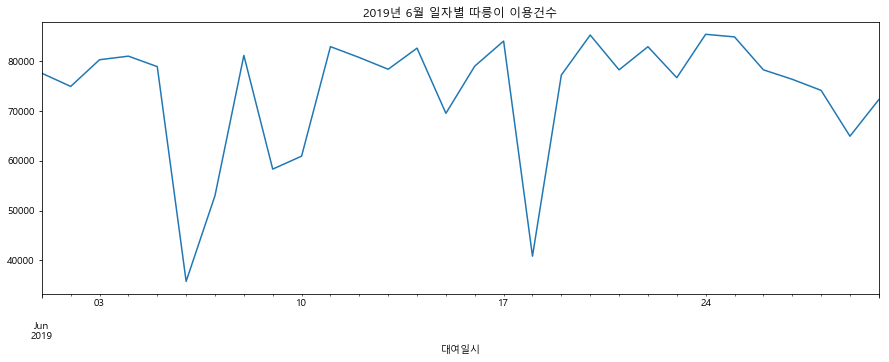

In [57]:
# 꺽은선 그래프로 표시해본다.

daily_ride.plot(kind='line', title='2019년 6월 일자별 따릉이 이용건수', \
                figsize = (15,5));

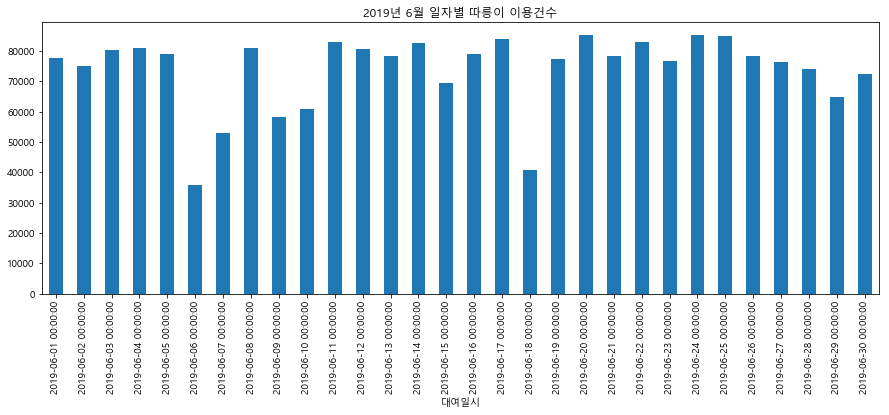

In [58]:
# 막대 그래프로 표시해본다.

daily_ride.plot(kind='bar', title='2019년 6월 일자별 따릉이 이용건수', \
                figsize = (15,5));

분석결과 >

6일은 현충일로 공유일임에도 18일과 같이 비가 와서 따릉이 이용률이 저조하였다. 따릉이 이용이 날씨에 영향을 받는다. 날씨 외에 요일별 영향은 없어 보인다.

## 3-2. 요일별 따릉이 이용건수

In [59]:
bike_ride.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,주말구분,일자,대여시간대,반납시간대
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00,월,평일,3,8,9


In [60]:
# 요일별 따릉이 이용건수

dayofweek_ride = bike_ride.pivot_table( \
                     index = '요일', \
                     values = '자전거번호', \
                     aggfunc = 'count')
dayofweek_ride.columns = ['이용건수']
dayofweek_ride

,이용건수
요일,
금,287907
목,275658
수,314982
월,310521
일,361090
토,375943
화,289531


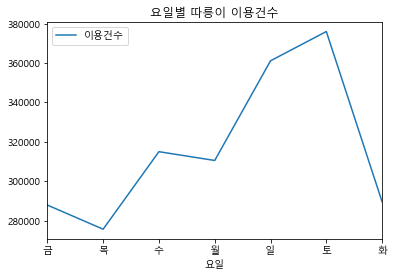

In [61]:
dayofweek_ride.plot(kind='line', rot=0, title='요일별 따릉이 이용건수');

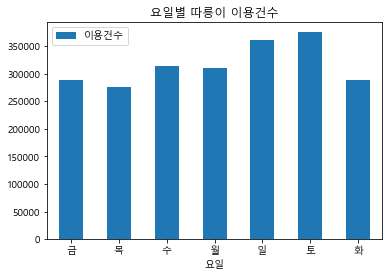

In [62]:
dayofweek_ride.plot(kind='bar', rot=0, title='요일별 따릉이 이용건수');

분석결과 >

주말이 평일보다 이용량이많고 평일은 목요일이 좀 이용량이 적다.

## 3-3. 대여시간대별 따릉이 이용건수

In [63]:
hourly_ride = bike_ride.pivot_table(\
                      index = '대여시간대', \
                      values = '자전거번호', \
                      aggfunc = 'count'
                    )
hourly_ride.columns = ['이용건수']
hourly_ride

,이용건수
대여시간대,
0,74628
1,56956
2,40981
3,30747
4,17751
5,16622
6,29987
7,68443
8,115034


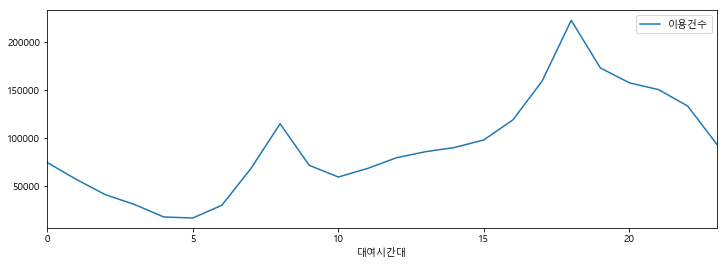

In [64]:
hourly_ride.plot(kind='line', rot=0, figsize=(12, 4));

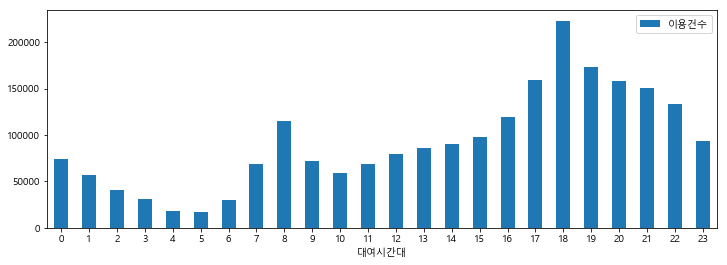

In [65]:
hourly_ride.plot(kind='bar', rot=0, figsize=(12, 4));

## 3-4. 대여시간대 x 요일 따릉이 이용건수

In [66]:
hourly_dayofweek_ride = bike_ride.pivot_table(\
                      index = '대여시간대', \
                      columns = '요일', \
                      values = '자전거번호', \
                      aggfunc = 'count'
                     )
hourly_dayofweek_ride

요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,8398,9596,8641,7480,17094,13470,9949
1,6755,7528,7236,4860,11755,11275,7547
2,4771,5867,5342,3309,8821,8368,4503
3,3051,4000,3437,2102,8766,6232,3159
4,1984,2407,2163,1546,4087,3591,1973
5,2071,2457,2500,2075,2571,2627,2321
6,4259,4548,5404,4462,3319,3356,4639
7,10362,11363,13876,11443,4427,4880,12092
8,17204,17910,23594,18801,6665,8705,22155


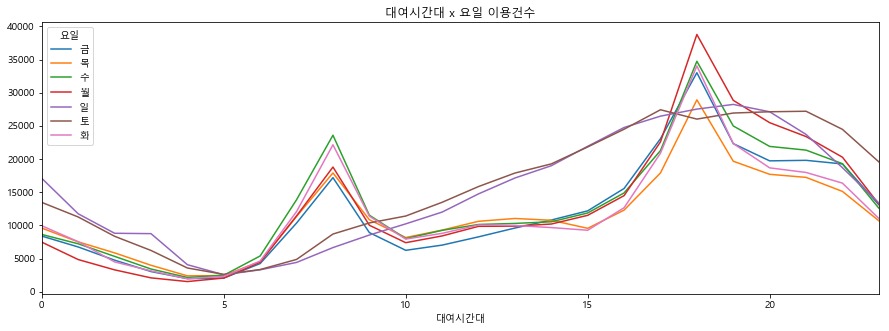

In [67]:
hourly_dayofweek_ride.plot(title = '대여시간대 x 요일 이용건수', figsize=(15, 5));

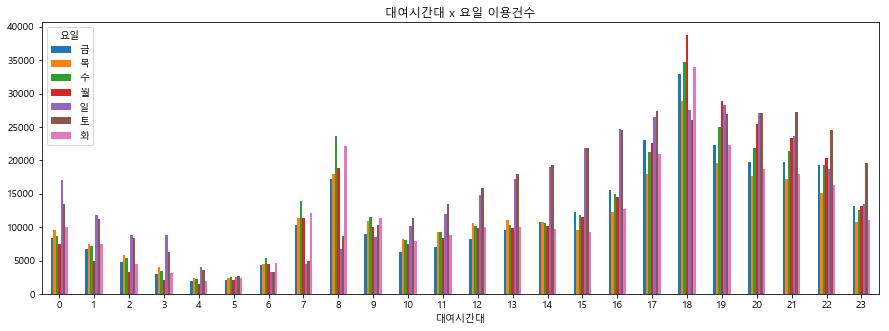

In [68]:
hourly_dayofweek_ride.plot(kind='bar', title = '대여시간대 x 요일 이용건수', \
                           figsize=(15, 5), rot=0);

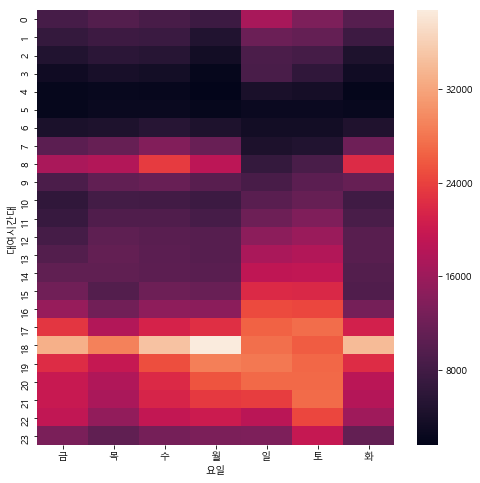

In [69]:
# heatmap으로 표현한다. 흐린색일수록 이용건수가 많다.

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(hourly_dayofweek_ride);

## 3-5. 대여시간대 x 주말구분 따릉이 분석

### 3-5-1. 대여시간대 x 주말구분 따릉이 이용건수 분석

In [70]:
# 24 시간의 각 시간대별로 공휴일, 주말, 평일의 자전거이용건수를 센다.

weekdays_hourly_ride = bike_ride.pivot_table(\
                     index = '대여시간대', \
                     columns = '주말구분', \
                     values = '자전거번호', \
                     aggfunc = 'count')
weekdays_hourly_ride

주말구분,주말,평일
대여시간대,,
0,30564,44064
1,23030,33926
2,17189,23792
3,14998,15749
4,7678,10073
5,5198,11424
6,6675,23312
7,9307,59136
8,15370,99664


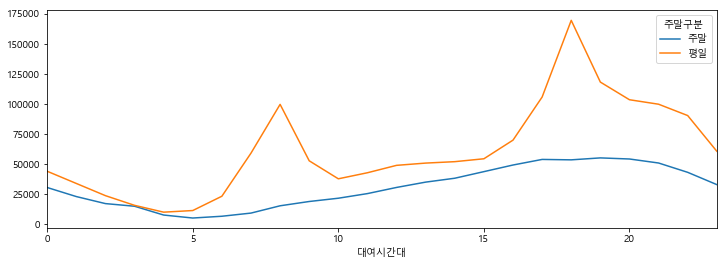

In [71]:
weekdays_hourly_ride.plot(figsize = (12,4));

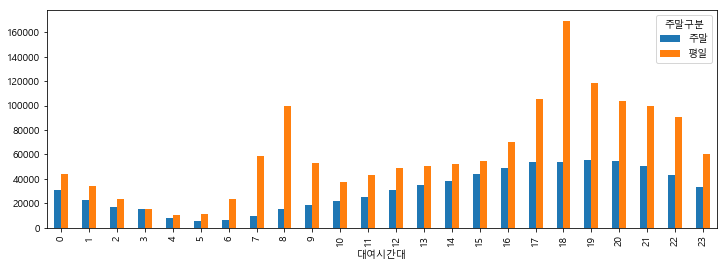

In [72]:
weekdays_hourly_ride.plot(kind='bar', figsize = (12,4));

분석결과 >

주말은 오후로 갈수록 따릉이 이용이 증가하고 평일은 오전 8시 오후6시인 출퇴근 시간에 따릉이 이용이 많다.

### 3-5-2. 대여시간대 x 주말구분 따릉이 이용시간의 평균

In [73]:
## 시간대별 이용시간 분포관찰

weekdays_hourly_usetime = bike_ride.pivot_table( \
                                    index = '대여시간대', \
                                    columns = '주말구분', \
                                    values = '이용시간', \
                                    aggfunc = 'mean')
weekdays_hourly_usetime

주말구분,주말,평일
대여시간대,,
0,25.15,22.31
1,24.32,22.27
2,23.34,22.22
3,22.33,21.87
4,21.32,20.94
5,22.08,21.02
6,24.90,18.82
7,26.25,16.60
8,23.13,14.63


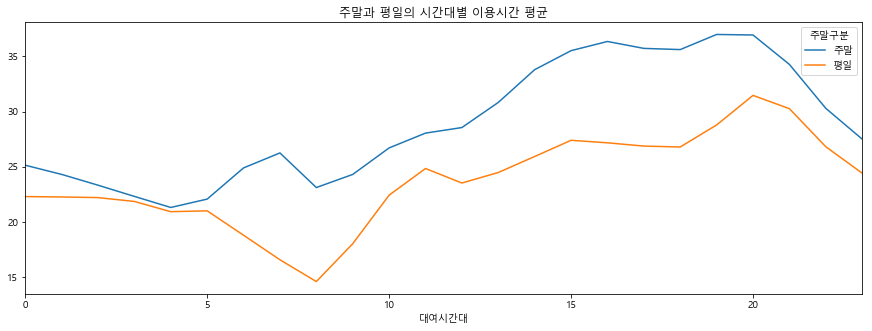

In [74]:
## 시간대별 이용시간 평균 분포관찰
# 주말이 주중보다 오래/멀리 이용한다.   ==> 운동 /레저용
# 주중 오전에는 이용시간이 짧다.  (출근시간은 짧게 이용한다. .)  ==> 이동수단 


weekdays_hourly_usetime.plot(title = '주말과 평일의 시간대별 이용시간 평균', \
                             figsize=(15, 5));

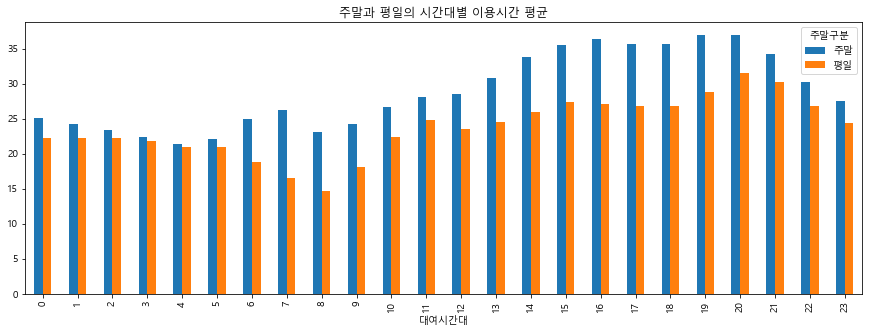

In [75]:
## 시간대별 이용시간 평균 분포관찰
# 주말이 주중보다 오래/멀리 이용한다.   ==> 운동 /레저용
# 주중 오전에는 이용시간이 짧다.  (출근시간은 짧게 이용한다. .)  ==> 이동수단 


weekdays_hourly_usetime.plot(kind='bar', title = '주말과 평일의 시간대별 이용시간 평균', \
                             figsize=(15, 5));

# 4. 지역구에 따른 데이터분석

## 4-1. 대여소정보 수집 및 필요한 컬럼 만들기

In [76]:
# 대여소들이 위치한 행정구역상 구를 알아내기 위해서 2019년 공공자전거 이용정보 파일을 
# 읽어들이고 데이터프레임의 첫부분을 살펴본다.

bike_shop = pd.read_excel('./data/공공자전거 대여소 정보_201905.xlsx')
bike_shop.head()

,구분,대여소번호,대여소명,위도,경도,거치대수
0,마포구,101,101. (구)합정동 주민센터,37.55,126.91,5
1,마포구,102,102. 망원역 1번출구 앞,37.56,126.91,20
2,마포구,103,103. 망원역 2번출구 앞,37.55,126.91,14
3,마포구,104,104. 합정역 1번출구 앞,37.55,126.91,13
4,마포구,105,105. 합정역 5번출구 앞,37.55,126.91,5


In [77]:
bike_gu = bike_shop[['구분', '대여소번호', '대여소명', '위도', '경도']]
bike_gu.head(1)

,구분,대여소번호,대여소명,위도,경도
0,마포구,101,101. (구)합정동 주민센터,37.55,126.91


In [78]:
bike_ride.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,주말구분,일자,대여시간대,반납시간대
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00,월,평일,3,8,9


In [79]:
# 대여 대여소번호를 사용하여 대여 대여소가 있는 대여구 대여구위도와 대여구경도 컬럼을 만든다.

bike_ride = bike_ride.merge(bike_gu, left_on='대여 대여소번호', right_on='대여소번호')

bike_ride.drop(['대여소번호', '대여소명'], axis='columns', inplace=True)
bike_ride.rename(columns={'구분' : '대여구',\
                          '위도' : '대여점위도', \
                          '경도' : '대여점경도'}, \
                 inplace=True)
bike_ride.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,주말구분,일자,대여시간대,반납시간대,대여구,대여점위도,대여점경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.00,월,평일,3,8,9,동대문구,37.56,127.06
1,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.00,수,평일,5,8,8,동대문구,37.56,127.06


In [80]:
bike_ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209349 entries, 0 to 2209348
Data columns (total 19 columns):
자전거번호       object
대여일시        datetime64[ns]
대여 대여소번호    int64
대여 대여소명     object
대여거치대       int64
반납일시        datetime64[ns]
반납대여소번호     int64
반납대여소명      object
반납거치대       int64
이용시간        int64
이용거리        float64
요일          object
주말구분        object
일자          int64
대여시간대       int64
반납시간대       int64
대여구         object
대여점위도       float64
대여점경도       float64
dtypes: datetime64[ns](2), float64(3), int64(8), object(6)
memory usage: 337.1+ MB


In [81]:
bike_ride.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
요일          0
주말구분        0
일자          0
대여시간대       0
반납시간대       0
대여구         0
대여점위도       0
대여점경도       0
dtype: int64

## 4-2. 대여구별 이용건수 분석

### 4-2-1. 대여구별 이용건수 계산하기

In [82]:
gu_use = bike_ride.groupby('대여구')['자전거번호'].count().sort_values()
                    
gu_use

대여구
금천구      33488
도봉구      38697
강북구      40563
용산구      47993
중구       48533
동작구      54094
중랑구      56413
은평구      62996
양천구      64154
서대문구     67561
성북구      71985
동대문구     77505
강동구      78231
구로구      78696
종로구      81944
관악구      83382
강남구      97081
서초구      97718
성동구     103806
노원구     113823
강서구     141006
광진구     141996
마포구     158539
영등포구    179439
송파구     189706
Name: 자전거번호, dtype: int64

### 4-2-2. 막대그래프로 표시하기

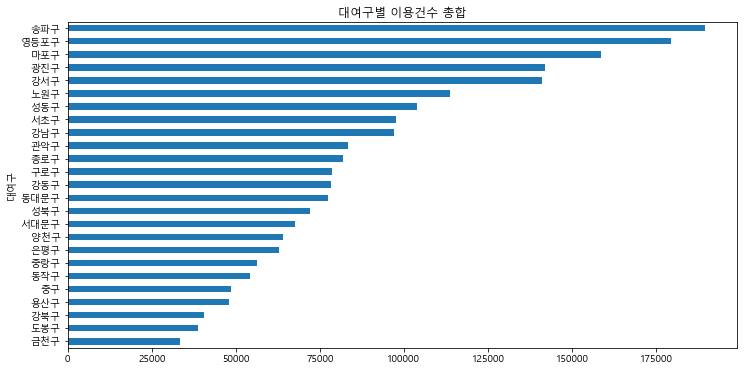

In [83]:
gu_use.plot(kind='barh', title='대여구별 이용건수 총합', figsize=(12, 6));

### 4-2-3. 지도로 표시하기

In [84]:
import folium
#import folium.plugins

# json파일 로딩
import json

geo_str = json.load(open('./data/seoul.json', encoding='utf-8'))

In [85]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = bike_ride['대여점위도'].mean()
lon = bike_ride['대여점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

map.choropleth(
    geo_data = geo_str,
    data = gu_use,  
    columns = [gu_use.index, gu_use],
    fill_color = 'YlGnBu',
    key_on = 'feature.properties.name')
   
map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## 4-3. 대여구별 이용시간 분석

### 4-3-1. 대여구별 이용시간 평균 계산하기

In [86]:
구별이용시간평균 = bike_ride.groupby('대여구')['이용시간'].mean().sort_values()
구별이용시간평균

대여구
강서구    23.14
성북구    23.17
종로구    23.32
강북구    23.57
동대문구   23.78
중랑구    24.24
노원구    24.26
광진구    24.95
도봉구    24.99
은평구    25.16
강동구    25.39
양천구    25.49
중구     25.95
금천구    26.40
구로구    26.48
관악구    26.51
송파구    27.85
서대문구   28.25
영등포구   29.47
성동구    30.01
마포구    30.66
동작구    31.66
강남구    31.79
서초구    32.09
용산구    35.30
Name: 이용시간, dtype: float64

### 4-3-2. 막대그래프로 표시하기

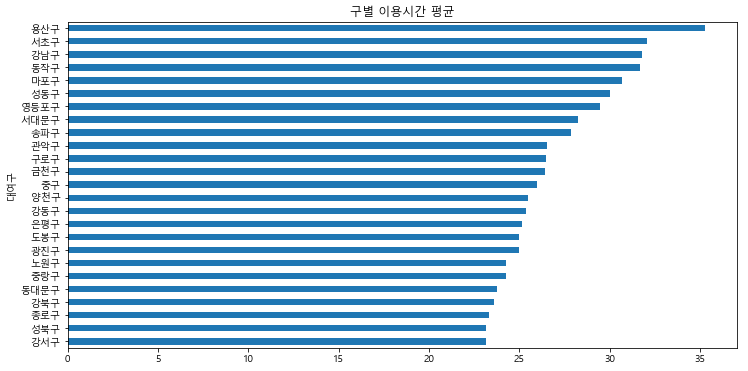

In [87]:
구별이용시간평균.plot(kind='barh', title='구별 이용시간 평균', figsize=(12, 6));

### 4-3-3. 지도에 표시하기

In [88]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = bike_ride['대여점위도'].mean()
lon = bike_ride['대여점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

map.choropleth(
    geo_data = geo_str,
    data = 구별이용시간평균,  
    columns = [구별이용시간평균.index, 구별이용시간평균],
    fill_color = 'YlGnBu',
    key_on = 'feature.properties.name')
   
map

분석결과 >

구별 평균이용거리 평균과 구별 평균이용시간 평균은 상당히 비숫한 지도를 보여주고 있다. 상관관계가 높을 것으로 보인다. 멀리가려면 오래 이용해야하니 당연한 결과다.

# 5. 일자 x 대여구 데이터분석

## 5-1. 일자 x 대여구 따릉이 이용건수 계산하기

In [89]:
day_gu_use = bike_ride.pivot_table( \
                     index = '일자', \
                     columns = '대여구', \
                     values = '자전거번호', \
                     aggfunc = 'count')
day_gu_use

대여구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
일자,,,,,,,,,,,,,,,,,,,,,
1,3227,2774,1460,4476,3030,5215,2604,934,4015,1366,...,3505,2516,7206,2229,6327,1879,2286,2688,1561,1977
2,3071,2582,1518,4250,3198,5102,2526,916,3943,1351,...,3628,2444,6545,2056,6270,1883,2184,2463,1387,1807
3,3873,2734,1398,4987,3033,5290,2879,1340,4097,1414,...,3676,2620,6233,2186,6813,1663,2170,3090,1837,2047
4,3601,2820,1414,5120,3030,5213,2981,1281,4451,1441,...,3998,2728,6587,2364,6483,1543,2182,2896,1836,2082
5,3303,2735,1442,5280,3036,4879,2829,1294,4341,1385,...,3672,2573,6501,2278,6296,1595,2176,3120,1939,2113
6,1449,1371,743,2125,1448,2298,1282,456,2101,729,...,1659,1360,3050,1005,2566,739,1147,1209,669,1096
7,2458,1878,899,3320,1959,3201,1870,674,2746,880,...,2481,1733,4676,1551,4388,1148,1536,1994,1090,1218
8,3345,2978,1540,4712,3343,5437,2787,953,4159,1493,...,3629,2623,7369,2372,6859,1927,2370,2573,1472,2084
9,2380,2194,1216,3354,2561,3772,1922,661,3134,1120,...,2719,2088,5236,1706,4538,1316,1668,2069,1126,1514


## 5-2. heatmap으로 표시하기

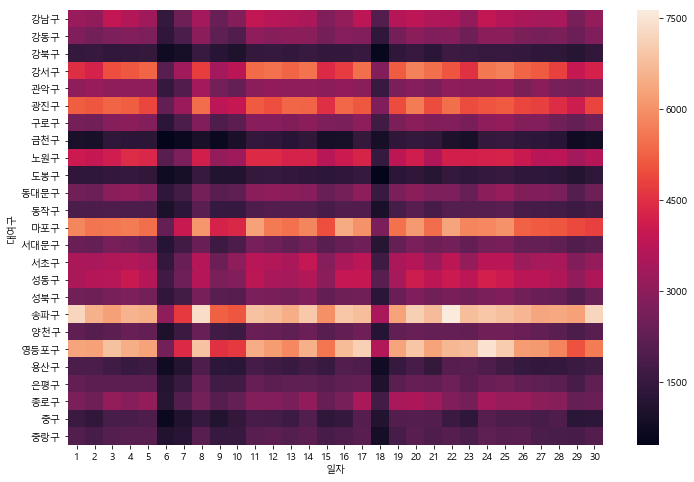

In [90]:
# heatmap으로 표현한다. 흐린색일수록 이용건수가 많다.

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(day_gu_use.T);

## 5-3. 박스 그래프로 표시하기

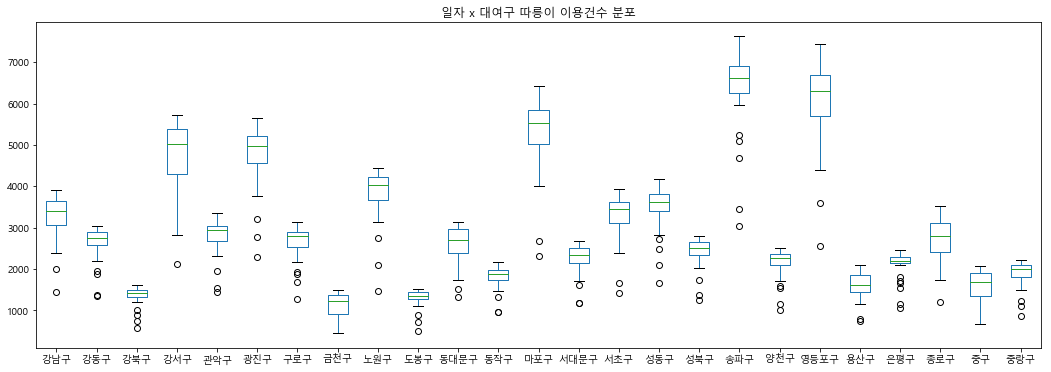

In [91]:
day_gu_use.plot(kind='box', figsize=(18, 6), title='일자 x 대여구 따릉이 이용건수 분포');

# 6. 대여시간대 x 대여구 데이터분석

## 6-1. 대여시간대 x 대여구 따릉이 이용건수 계산하기

In [92]:
hourly_gu_use = bike_ride.pivot_table( \
                     index = '대여시간대', \
                     columns = '대여구', \
                     values = '자전거번호', \
                     aggfunc = 'count')
hourly_gu_use

대여구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
대여시간대,,,,,,,,,,,,,,,,,,,,,
0,2643,3230,2066,4459,3769,5314,2650,790,4855,1529,...,3003,3165,6014,2091,4892,1641,2389,1697,1180,2369
1,2660,2342,1706,3306,2830,3621,1797,650,3632,1297,...,2096,2501,5150,1770,3314,1334,1873,1299,893,1944
2,2360,1852,1378,2442,1899,2469,1291,496,2610,853,...,1394,1941,3339,1143,2190,935,1330,978,683,1413
3,1689,1398,932,1909,1550,1830,853,328,1932,668,...,1103,1337,2390,859,1627,755,977,749,564,1171
4,920,620,595,1152,990,998,572,173,1052,403,...,743,701,1252,479,1109,512,508,552,407,580
5,648,686,392,1072,745,992,543,161,829,416,...,698,522,1086,565,1140,305,527,741,442,597
6,1316,1173,499,2144,1042,1687,1081,511,1413,498,...,1092,1089,2326,988,2682,541,1025,1079,538,826
7,2404,2420,1047,4854,2800,3512,3091,1623,2841,1120,...,2588,2297,5214,2674,6516,1094,2430,2664,1259,2128
8,4951,3728,1533,9357,4350,6988,4691,3337,4491,1541,...,5446,3763,9105,3886,9939,1866,3420,4317,2262,3061


## 6-2. heatmap으로 표시하기

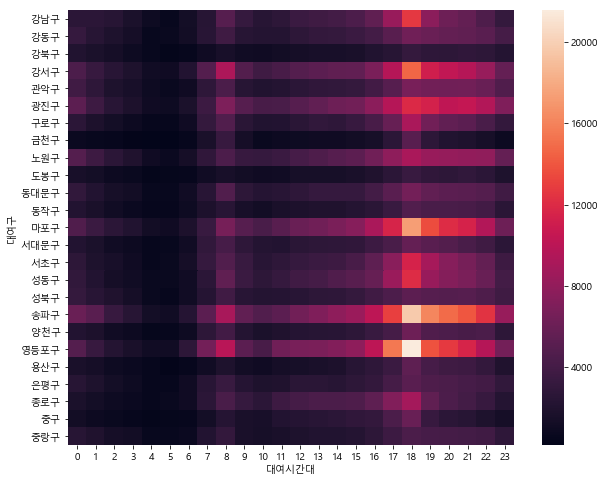

In [93]:
# heatmap으로 표현한다. 흐린색일수록 이용건수가 많다.

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(hourly_gu_use.T);

분석결과 >

모든구가 출퇴근 시간인 오전 8시와 오후 6시에 대여량이 많다. 출근시간대보다는 퇴근시간대에 이용량이 많다. 특히 영등포구는 오후 6시에 대여량이 많다. 영등포구 다음으로 송파구, 마포구, 강서구, 광진구, 강남구, 종로구 등이 퇴근시간에 대여량이 많다.

## 6-3. 박스 그래프로 표시하기

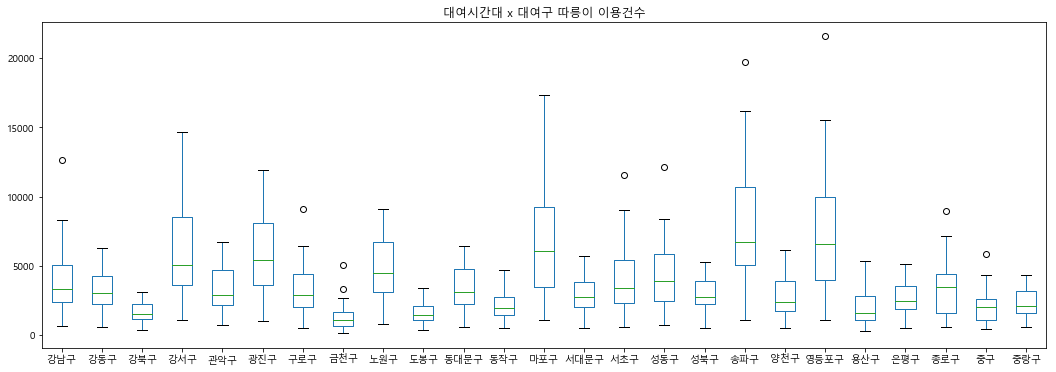

In [94]:
hourly_gu_use.plot(kind='box', figsize=(18, 6), title='대여시간대 x 대여구 따릉이 이용건수');

# 7. 이용건수가 많은 대여소

## 7-1. 대여 대여소 x 주말구분 이용건수 계산

In [95]:
# 대여 대여소의 이용건수 계산

rent_bike = bike_ride.pivot_table( \
                     index = ['대여 대여소명', '대여점위도', '대여점경도'], \
                     columns = '주말구분', \
                     values = '자전거번호', \
                     aggfunc = 'count')
rent_bike.head()

,,주말구분,주말,평일
대여 대여소명,대여점위도,대여점경도,,
(구)신한은행 중랑교지점,37.60,127.08,391,832
(구)합정동 주민센터,37.55,126.91,357,715
3호선 매봉역 3번출구앞,37.49,127.05,443,1049
419민주묘지역,37.65,127.01,547,946
8삼호@ 2동 ( 간선도로),37.49,127.05,111,316


## 7-2. 인기있는 주말대여점 50개와 평일대여점 50개를 선택한다.

In [96]:
## 1강변따라 많이 나타나는 듯.  주중 주말 일부 다른 곳은 있으나 따릉이는 강변에서 많이 이용.(하천 포함) 
# 주말에 대여량이 많은 대여소 알기

주말대여점50 = rent_bike.nlargest(50, '주말')['주말'].reset_index()
주말대여점50

,대여 대여소명,대여점위도,대여점경도,주말
0,뚝섬유원지역 1번출구 앞,37.53,127.07,5777
1,여의나루역 1번출구 앞,37.53,126.93,5286
2,"고속터미널역 8-1번, 8-2번 출구 사이",37.51,127.00,3932
3,봉림교 교통섬,37.48,126.93,3699
4,롯데월드타워(잠실역2번출구 쪽),37.51,127.10,3231
5,마포구민체육센터 앞,37.56,126.90,3229
6,건대입구역 사거리(롯데백화점),37.54,127.07,3169
7,홍대입구역 2번출구 앞,37.56,126.92,2922
8,잠실새내역 5번 출구 뒤,37.51,127.09,2632
9,당산육갑문,37.54,126.90,2327


In [97]:
### 평일에 대여량이 많은 대여소 알기

평일대여점50 = rent_bike.nlargest(50, '평일')['평일'].reset_index()
평일대여점50

,대여 대여소명,대여점위도,대여점경도,평일
0,뚝섬유원지역 1번출구 앞,37.53,127.07,6840
1,여의나루역 1번출구 앞,37.53,126.93,6241
2,봉림교 교통섬,37.48,126.93,5986
3,홍대입구역 2번출구 앞,37.56,126.92,5617
4,롯데월드타워(잠실역2번출구 쪽),37.51,127.10,5383
5,마곡나루역 5번출구 뒤편,37.57,126.83,4648
6,건대입구역 사거리(롯데백화점),37.54,127.07,4573
7,"고속터미널역 8-1번, 8-2번 출구 사이",37.51,127.00,4556
8,양천향교역 7번출구앞,37.57,126.84,4342
9,안암로터리 버스정류장 앞,37.58,127.03,4127


## 7-3. 지도에 표시하기

In [98]:
# 주말대여점10 위치의 가운데 지점의 위도와 경도를 중심으로 map을 그려본다.

lat = 주말대여점50['대여점위도'].mean()
lon = 주말대여점50['대여점경도'].mean()
center = [lat, lon]
map = folium.Map(location = center, zoom_start = 12)

for i in 주말대여점50.index.values:
    
    sub_lat = 주말대여점50.loc[i, '대여점위도']
    sub_lon = 주말대여점50.loc[i, '대여점경도']
    title = 주말대여점50.loc[i,'대여 대여소명']
    
    #지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat,sub_lon], popup = title).add_to(map)

map

In [99]:
# 평일에 대여량이 많은 대여소 지도에 표시하기

for i in 평일대여점50.index.values:
    
    sub_lat = 평일대여점50.loc[i, '대여점위도']
    sub_lon = 평일대여점50.loc[i, '대여점경도']
    title = 평일대여점50.loc[i,'대여 대여소명']
    
    #지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat,sub_lon], popup = title, \
                  icon=folium.Icon(color='red',icon='star')).add_to(map)

map

In [100]:
# 주말대여점10 위치의 가운데 지점의 위도와 경도를 중심으로 map을 그려본다.

lat = 주말대여점50['대여점위도'].mean()
lon = 주말대여점50['대여점경도'].mean()
center = [lat, lon]
map = folium.Map(location = center, zoom_start = 12)

for i in 주말대여점50.index.values :
 
    # 표시 마커 설정
    folium.CircleMarker(
        location = [주말대여점50.loc[i,'대여점위도'], 주말대여점50.loc[i,'대여점경도']],
        radius = 6,
        color = 'blue',
        fill = True,
        fill_color = 'blue'
        ).add_to(map)
    
    
# 평일에 대여량이 많은 대여소 지도에 표시하기

for index, row in 평일대여점50.iterrows():
    folium.CircleMarker(
        location = [row['대여점위도'], row['대여점경도']], 
        radius = 3,
        color = 'red',
        fill = True, 
        fill_color = 'red'
        ).add_to(map)

map


분석결과 >

주말과 평일에 모두 이용량이 많은 대여점이 많다.